**Importing Genius lyrics for any artist's album**

*(Draft)*

In [1]:
import lyricsgenius as lg

import re
import datascience as ds
from datascience import Table

from PIL import Image
import requests

import warnings
from unidecode import unidecode
warnings.filterwarnings('ignore')

A Genius client access token is needed for this code to run:

In [2]:
client_access_token = ''

In this notebook I will set verbose = False to prevent search results from printing:

In [3]:
genius = lg.Genius(client_access_token,
            skip_non_songs=False, excluded_terms=['(Remix)'],
            remove_section_headers=True, verbose=False)

In [4]:
name = input("Enter artist's name: ")
album_name = input("Enter album title: ")

Enter artist's name: Mac Miller
Enter album title: Circles


In [5]:
artist = genius.search_artist(name, max_songs=3, sort='popularity')

In [6]:
album = genius.search_album(album_name, name)
album_dict = genius.search_albums(album_name, per_page = 1)

The following cell retrieves the album id needed for genius.album_tracks(int) from album (of type dict):

In [7]:
album_id = album_dict.get('sections')[0].get('hits')[0].get('result').get('id')

In [8]:
album_info = genius.album_tracks(str(album_id)).get('tracks')

for tracks in album_info:
    track_count = tracks.get('number')
num_tracks = list(range(track_count))

track_names = []

for n in num_tracks:
    track_names.append(album_info[n]['song']['title'])

In [9]:
def album_to_lyrics(album):
    
    song_lyrics = []
    
    for i in range(len(album)):
       
        i += 0 
        
        song = artist.song(album[0+i])
        lyrics = song.lyrics
        
        # reformat the lyrics
        lyrics = lyrics.replace('\n', ' ')
        lyrics = re.sub(r"[0-9]*EmbedShare URLCopyEmbedCopy", '', lyrics)
        lyrics = unidecode(lyrics)
        song_lyrics.append(lyrics)
        
        
    titles = []
    words = []
    
    for i in range(len(album)):
        titles.append(album[i])
    for i in range(len(album)):
        words.append(song_lyrics[i])
        
    album_table = ds.Table().with_columns("Title", titles, 
                  "Lyrics", words) # include if csv table is desired output --> .to_csv(album_title)
        
    return album_table

In [10]:
album_to_lyrics(track_names).show()

Title,Lyrics
Circles,"Well, this is what it look like right before you fall St ..."
Complicated,"Outside is cloudy, but I like that better (Better, bette ..."
Blue World,It's a blue world without you It's a blue world alone Y ...
Good News,I spent the whole day in my head Do a little spring clea ...
I Can See,I'm so close I can taste it The man on the moon keep pla ...
Everybody,Everybody's gotta live And everybody's gonna die Everybo ...
Woods,"Yeah, yeah, yeah, yeah, yeah, yeah Yeah, things like th ..."
Hand Me Downs,"I'm thinkin' maybe I should thank you Oh, baby, I should ..."
That’s on Me,"That's on me, that's on me, I know That's on me, that's ..."
Hands,"Yeah, yeah, yeah, yeah, yeah, yeah Yeah, yeah, yeah, yea ..."


Show album art (optional):

Cover Art: 


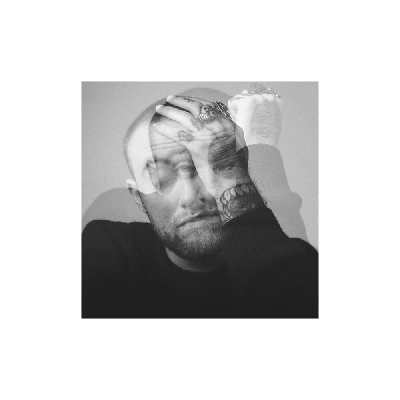

In [11]:
print('Cover Art: ')
im = Image.open(requests.get(album.cover_art_url, stream=True).raw)
im.resize((400,400))